<a href="https://colab.research.google.com/github/SWLee1212/TensorFlow-in-Practice/blob/master/Course_4_Week_3_Lesson_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [0]:
# from __future__ import absolute_import, division, print_function, unicode_literals


# import tensorflow_datasets as tfds
# import tensorflow as tf
# print(tf.__version__)

In [0]:
# If the tf.__version__ is 1.x, please run this cell
# !pip install tensorflow==2.0.0-beta0

In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 1772s 5s/step - loss: 0.5435 - accuracy: 0.7198 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 1529s 4s/step - loss: 0.3556 - accuracy: 0.8561 - val_loss: 0.4195 - val_accuracy: 0.8194
Epoch 3/10
391/391 [==============================] - 1526s 4s/step - loss: 0.4324 - accuracy: 0.8041 - val_loss: 0.6638 - val_accuracy: 0.6125
Epoch 4/10
391/391 [==============================] - 1533s 4s/step - loss: 0.5239 - accuracy: 0.7580 - val_loss: 0.5687 - val_accuracy: 0.7224
Epoch 5/10
391/391 [==============================] - 1544s 4s/step - loss: 0.4964 - accuracy: 0.7669 - val_loss: 0.5661 - val_accuracy: 0.7051
Epoch 6/10
391/391 [==============================] - 1522s 4s/step - loss: 0.3680 - accuracy: 0.8482 - val_loss: 0.4498 - val_accuracy: 0.8162
Epoch 7/10
391/391 [==============================] - 1520s 4s/step - loss: 0.3639 - accuracy: 0.8538 - val_loss: 0.5124 - val_a

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

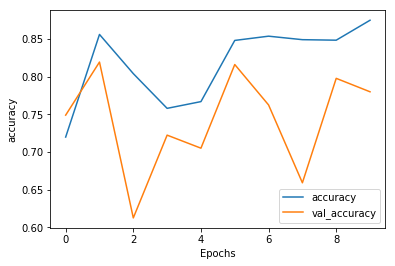

In [13]:
plot_graphs(history, 'accuracy')

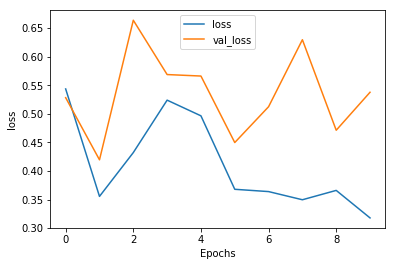

In [14]:
plot_graphs(history, 'loss')